In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from models.mnist import MNIST8k
from torchsummary import summary
from utils import TrainTest, PlotOutput

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
device = TrainTest.get_device()
device

'cuda'

In [3]:
mean = [0.1307]
std = [0.3081]

# Train data transformations
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-7., 7.), fill=(0,)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

In [12]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_data.mean = torch.tensor(mean).reshape(len(mean), 1, 1)
test_data.mean = train_data.mean

train_data.std = torch.tensor(std).reshape(len(std), 1, 1)
test_data.std = train_data.std

classes = train_data.classes

In [5]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

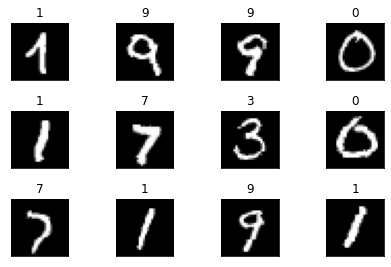

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

In [7]:
"""
RF_out = RF_in + (kernel-1) * J_in
J_out = J_in * stride
"""

'\nRF_out = RF_in + (kernel-1) * J_in\nJ_out = J_in * stride\n'

In [15]:
model = MNIST8k().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             576
       BatchNorm2d-6            [-1, 8, 28, 28]              16
              ReLU-7            [-1, 8, 28, 28]               0
           Dropout-8            [-1, 8, 28, 28]               0
        BasicBlock-9            [-1, 8, 28, 28]               0
       InputBlock-10            [-1, 8, 28, 28]               0
           Conv2d-11            [-1, 8, 14, 14]             576
           Conv2d-12            [-1, 8, 14, 14]             576
      BatchNorm2d-13            [-1, 8, 14, 14]              16
             ReLU-14            [-1, 8,

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.20, verbose=True)

criterion = F.cross_entropy

Adjusting learning rate of group 0 to 1.0000e-02.


In [18]:
EPOCHS = 15

run = TrainTest(model=model, 
                trainloader=train_loader, 
                testloader=test_loader, 
                optimizer=optimizer, 
                criterion=criterion, 
                scheduler=scheduler,
                target_layers=None)

run(epochs=EPOCHS, cam=False, image_idx=None)

Train: Loss=0.3105 Batch_id=1874 Accuracy=90.91: 100%|██████████| 1875/1875 [00:28<00:00, 65.97it/s]


Test set: Average loss: 0.0659, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0799 Batch_id=1874 Accuracy=97.62: 100%|██████████| 1875/1875 [00:28<00:00, 65.78it/s]


Test set: Average loss: 0.0570, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0632 Batch_id=1874 Accuracy=98.08: 100%|██████████| 1875/1875 [00:28<00:00, 64.90it/s]


Test set: Average loss: 0.0413, Accuracy: 9869/10000 (98.69%)

Adjusting learning rate of group 0 to 1.0000e-02.


Train: Loss=0.0543 Batch_id=1874 Accuracy=98.31: 100%|██████████| 1875/1875 [00:29<00:00, 64.20it/s]


Test set: Average loss: 0.0295, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 2.0000e-03.


Train: Loss=0.0343 Batch_id=1874 Accuracy=98.95: 100%|██████████| 1875/1875 [00:28<00:00, 66.12it/s]


Test set: Average loss: 0.0205, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 2.0000e-03.


Train: Loss=0.0318 Batch_id=1874 Accuracy=99.01: 100%|██████████| 1875/1875 [00:27<00:00, 67.32it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 2.0000e-03.


Train: Loss=0.0302 Batch_id=1874 Accuracy=99.08: 100%|██████████| 1875/1875 [00:28<00:00, 65.49it/s]


Test set: Average loss: 0.0200, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 2.0000e-03.


Train: Loss=0.0289 Batch_id=1874 Accuracy=99.08: 100%|██████████| 1875/1875 [00:28<00:00, 65.50it/s]


Test set: Average loss: 0.0193, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 4.0000e-04.


Train: Loss=0.0254 Batch_id=1874 Accuracy=99.20: 100%|██████████| 1875/1875 [00:27<00:00, 67.23it/s]


Test set: Average loss: 0.0184, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 4.0000e-04.


Train: Loss=0.0255 Batch_id=1874 Accuracy=99.19: 100%|██████████| 1875/1875 [00:28<00:00, 66.67it/s]


Test set: Average loss: 0.0179, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 4.0000e-04.


Train: Loss=0.0249 Batch_id=1874 Accuracy=99.24: 100%|██████████| 1875/1875 [00:28<00:00, 64.88it/s]


Test set: Average loss: 0.0175, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 4.0000e-04.


Train: Loss=0.0241 Batch_id=1874 Accuracy=99.30: 100%|██████████| 1875/1875 [00:27<00:00, 67.01it/s]


Test set: Average loss: 0.0181, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 8.0000e-05.


Train: Loss=0.0233 Batch_id=1874 Accuracy=99.24: 100%|██████████| 1875/1875 [00:27<00:00, 66.98it/s]


Test set: Average loss: 0.0184, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 8.0000e-05.


Train: Loss=0.0230 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:28<00:00, 66.90it/s]


Test set: Average loss: 0.0174, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 8.0000e-05.


Train: Loss=0.0236 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:27<00:00, 67.12it/s]


Test set: Average loss: 0.0188, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 8.0000e-05.


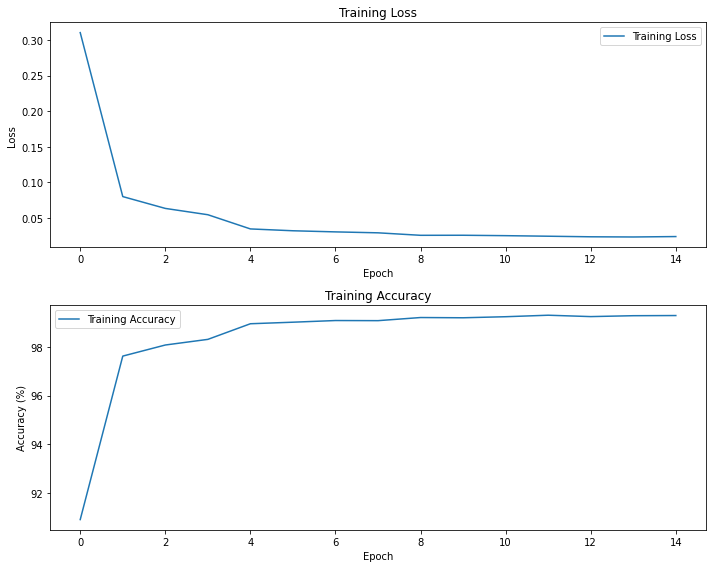

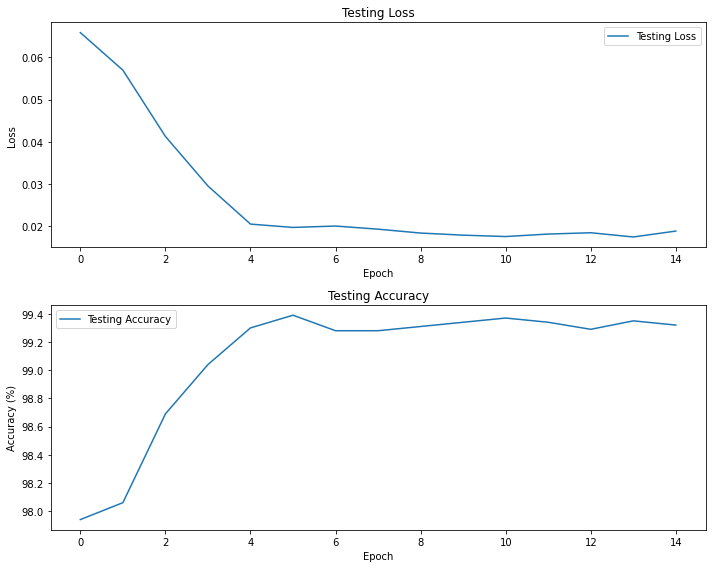

In [19]:
run.train.plot_stats()
run.test.plot_stats()

In [20]:
plot = PlotOutput(model, target_layers=target_layers, device=device)

100%|██████████| 313/313 [00:02<00:00, 149.60it/s]


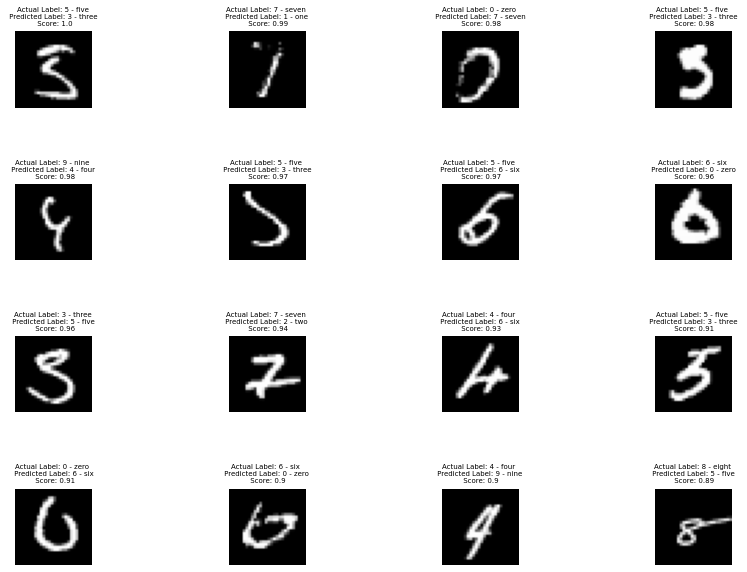

In [21]:
# plot incorrect plus very difficult classifications
plot.run_prediction(test_loader, ptype="incorrect")
plot.plot(n=16, class_list=classes, grad_cam=False)

100%|██████████| 313/313 [00:02<00:00, 117.84it/s]


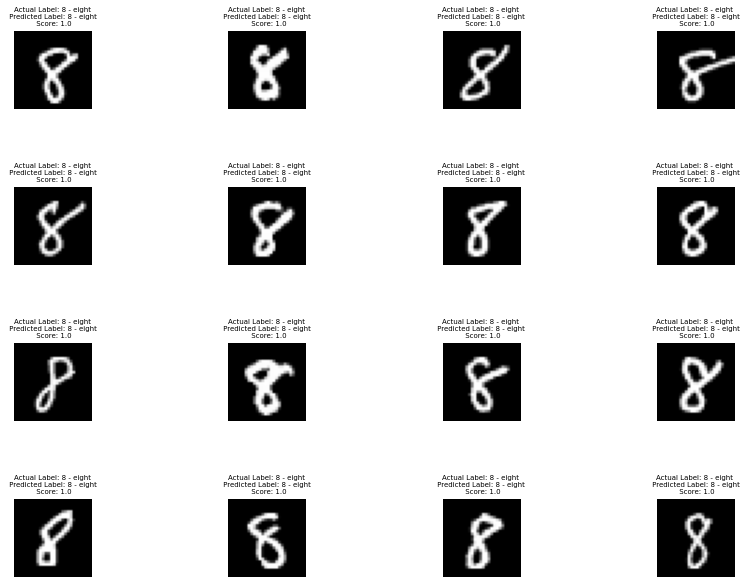

In [22]:
# plot correct yet difficult classifications
plot.run_prediction(test_loader, ptype="correct")
plot.plot(n=16, class_list=classes, grad_cam=False, reverse=True)